### Linear Classification Models: Task 1
##### Adapted by Dr. Harry Goldingay from solution by Miss Katrina Jones and Dr. Aniko Ekart (ML Module, 2021)

In [1]:
# Import general modules
import pandas as pd # For reading the csv
from sklearn.linear_model import Perceptron # Our chosen model
from sklearn.metrics import confusion_matrix # For creation of the confusion matrix
from sklearn.metrics import classification_report # For creation of precision, recall and f1-measures
from sklearn.metrics import accuracy_score # For help in comparing data given using accuracy score vs confusion matrix
import matplotlib.pyplot as plt

_Setting up and reading the database from the csv file._

In [2]:
#Use header=None to avoid the first row being used as column headers
df = pd.read_csv("haberman.csv",header=None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


_We can add textual column headers for readability_

In [3]:
df.columns = ['age','operationYear','positiveAuxNodes','survivalStatus']
df.head()

,age,operationYear,positiveAuxNodes,survivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.describe() # Useful in this context due to us having so much data - we can see the range of the values in each columns...

,age,operationYear,positiveAuxNodes,survivalStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Pre-Processing the Data: Grouping the data using the Year of Operation for the train-test split criteria
_We were asked to split the data so that there were 229 rows for the train set using the years 1958-1965, and 77 rows for the test data, using the years 1966-1969._

In [5]:
# Let's get the train set - so the data that resides between 1958-1965 (229 rows)
df_train = df.loc[(df['operationYear'] <= 65) & (df['operationYear'] >= 58)] # I chose to use split using boolean_indexing, but Pandas groupby is a good alternative
df_train.shape

(229, 4)

In [6]:
# Let's get the test set - so the data that resides above 1965 (77 rows)
df_test = df.loc[(df['operationYear'] <= 69) & (df['operationYear'] >= 66)] # I chose to use split using boolean_indexing, but Pandas groupby is a good alternative
df_test.shape

(77, 4)

#### Creating the Train and Test datasets
_Divide the dataset into training and testing sets, by using the data for years. 1958-1965 (229 instances) for training and 1966-1969 (77 instances) for testing. Now that we have split the data in such a way, we can do this simply:_

In [7]:
# Our train set...
# We will extract the independent (X) and dependent (y) variables with iloc as we have seen previously.
X_train = df_train.iloc[:,0:3]
y_train = df_train.iloc[:,3]

# Our test set...
# We will extract the independent and dependent variables by header name here, just to see how it is
# done. You should pick one method and stick to it!
X_test = df_test[['age','operationYear','positiveAuxNodes']]
y_test = df_test['survivalStatus']

#### Setting up the Perceptron 
_Apply a single perceptron using sklearn.linear_model.Perceptron._

In [8]:
p = Perceptron() # Instantiate the model we are using...
model = p.fit(X_train, y_train) #..train it on the data...
y_pred = model.predict(X_test) #...and then use it to make predictions.

#### Create a Confusion Matrix
_Use sklearn.metrics.confusion_matrix to obtain the confusion matrix of your classifier._

In [9]:
print(confusion_matrix(y_test, y_pred))

[[56  4]
 [13  4]]


_The output of confusion_matrix can be confusing to interpret!_  
_You can use ConfusionMatrixDisplay if you need a reminder of what the rows/columns represent._

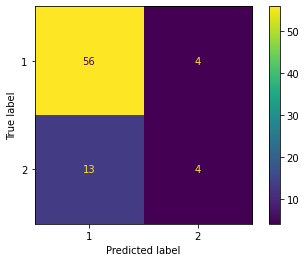

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=p.classes_).plot()

#### Create a Classification Report

_Use sklearn.metrics.classification_report to print out a report on precision, recall, f1-measure for both training and test data._

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.93      0.87        60
           2       0.50      0.24      0.32        17

    accuracy                           0.78        77
   macro avg       0.66      0.58      0.59        77
weighted avg       0.74      0.78      0.75        77



_We have been asked to run some experiments. Let's write some helper functions to make our lives easier!_

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# We are creating two helper functions, both of which will need to predict class labels.
# Factor the code into one function rather than duplicating it.
def predict_class_labels(classifier,X_train,y_train,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = classifier.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    #print(classifier.coef_)
    
    return y_pred

#This function will display the full results (confusion matrix, classification report)
def display_model_results_full(title,classifier,X_train,y_train,X_test,y_test):
    print(title + '. Full results')

    y_pred = predict_class_labels(classifier,X_train,y_train,X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=classifier.classes_).plot()
    plt.show() # Add to print the confusion matrix before the next line
    
    print(classification_report(y_test, y_pred))
    print('\n')

#This function will display selected scores (f1-score macro average, accuracy)
def display_model_results_brief(title,classifier,X_train,y_train,X_test,y_test):
    print(title + '. Brief results')
    
    y_pred = predict_class_labels(classifier,X_train,y_train,X_test)
    
    print('f1 score: {}'.format(f1_score(y_test,y_pred,average='macro')))
    print('accuracy: {}'.format(accuracy_score(y_test,y_pred)))
    print('\n')

Default perceptron. Full results


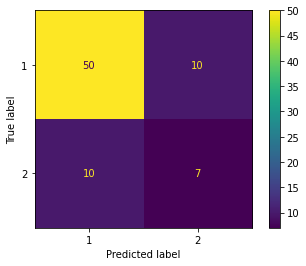

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        60
           2       0.41      0.41      0.41        17

    accuracy                           0.74        77
   macro avg       0.62      0.62      0.62        77
weighted avg       0.74      0.74      0.74        77



Default perceptron: tested on training data. Full results


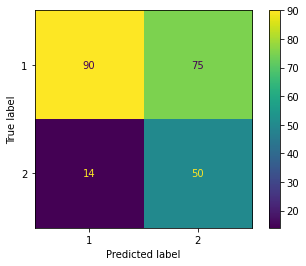

              precision    recall  f1-score   support

           1       0.87      0.55      0.67       165
           2       0.40      0.78      0.53        64

    accuracy                           0.61       229
   macro avg       0.63      0.66      0.60       229
weighted avg       0.74      0.61      0.63       229





In [13]:
display_model_results_full('Default perceptron',Perceptron(),X_train,y_train,X_test,y_test)
display_model_results_full('Default perceptron: tested on training data',Perceptron(),X_train,y_train,X_train,y_train)

#### Parameter Experiments  
_I have chosen to experiment with the penalty and the max_iter parameters_  
_You may have chosen others_

In [14]:
#Experiment with the penalty type.
display_model_results_brief('No penalty, default #epochs (1000)',Perceptron(),X_train,y_train,X_test,y_test)
display_model_results_brief('L2 penalty, default #epochs (1000)',Perceptron(penalty='l2'),X_train,y_train,X_test,y_test)
display_model_results_brief('L1 penalty, default #epochs (1000)',Perceptron(penalty='l1'),X_train,y_train,X_test,y_test)
display_model_results_brief('Elasticnet penalty, default #epochs (1000)',Perceptron(penalty='elasticnet'),X_train,y_train,X_test,y_test)

No penalty, default #epochs (1000). Brief results
f1 score: 0.6225490196078431
accuracy: 0.7402597402597403


L2 penalty, default #epochs (1000). Brief results
f1 score: 0.2957317073170732
accuracy: 0.2987012987012987


L1 penalty, default #epochs (1000). Brief results
f1 score: 0.6177422836175265
accuracy: 0.7012987012987013


Elasticnet penalty, default #epochs (1000). Brief results
f1 score: 0.20454545454545453
accuracy: 0.22077922077922077




In [15]:
display_model_results_brief('No penalty, 1 epoch',Perceptron(max_iter = 1),X_train,y_train,X_test,y_test)
display_model_results_brief('No penalty, 10 epochs',Perceptron(max_iter = 10),X_train,y_train,X_test,y_test)
display_model_results_brief('No penalty, 100 epochs',Perceptron(max_iter = 100),X_train,y_train,X_test,y_test)
display_model_results_brief('No penalty, 1000 epochs (default)',Perceptron(),X_train,y_train,X_test,y_test)

No penalty, 1 epoch. Brief results
f1 score: 0.4696969696969697
accuracy: 0.7402597402597403


No penalty, 10 epochs. Brief results
f1 score: 0.6225490196078431
accuracy: 0.7402597402597403


No penalty, 100 epochs. Brief results
f1 score: 0.6225490196078431
accuracy: 0.7402597402597403


No penalty, 1000 epochs (default). Brief results
f1 score: 0.6225490196078431
accuracy: 0.7402597402597403




C:\Users\Harry\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


# Task 2: Comparison to SVC
_As we can reuse the utility functions we wrote previously, this is fairly straightforward_

In [16]:
from sklearn.svm import SVC
display_model_results_brief('Default linear SVC',SVC(kernel='linear'),X_train,y_train,X_test,y_test)

Default linear SVC. Brief results
f1 score: 0.5463565891472868
accuracy: 0.7532467532467533




_Let's assume we have experimented with the SVC parameters and the default ones give us the best results. How does the (linear) SVC compare to the perceptron?_

Perceptron: tested on training data. Full results


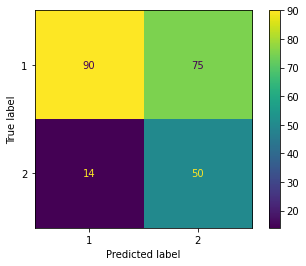

              precision    recall  f1-score   support

           1       0.87      0.55      0.67       165
           2       0.40      0.78      0.53        64

    accuracy                           0.61       229
   macro avg       0.63      0.66      0.60       229
weighted avg       0.74      0.61      0.63       229



Linear SVC: tested on training data. Full results


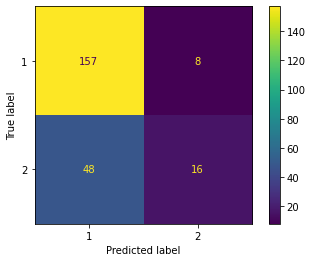

              precision    recall  f1-score   support

           1       0.77      0.95      0.85       165
           2       0.67      0.25      0.36        64

    accuracy                           0.76       229
   macro avg       0.72      0.60      0.61       229
weighted avg       0.74      0.76      0.71       229





In [17]:
display_model_results_full('Perceptron: tested on training data',Perceptron(),X_train,y_train,X_train,y_train)
display_model_results_full('Linear SVC: tested on training data',SVC(kernel='linear'),X_train,y_train,X_train,y_train)

Perceptron: tested on test data. Full results


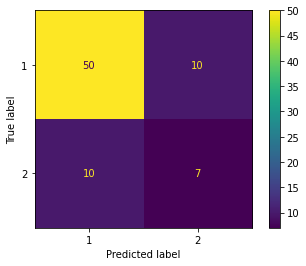

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        60
           2       0.41      0.41      0.41        17

    accuracy                           0.74        77
   macro avg       0.62      0.62      0.62        77
weighted avg       0.74      0.74      0.74        77



Linear SVC: tested on test data. Full results


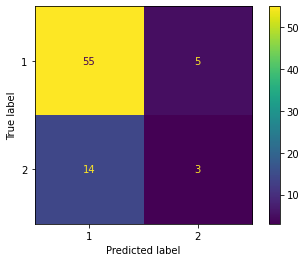

              precision    recall  f1-score   support

           1       0.80      0.92      0.85        60
           2       0.38      0.18      0.24        17

    accuracy                           0.75        77
   macro avg       0.59      0.55      0.55        77
weighted avg       0.70      0.75      0.72        77





In [18]:
display_model_results_full('Perceptron: tested on test data',Perceptron(),X_train,y_train,X_test,y_test)
display_model_results_full('Linear SVC: tested on test data',SVC(kernel='linear'),X_train,y_train,X_test,y_test)